In [20]:
import requests
import pandas as pd

NYC API Connection

In [21]:
import pandas as pd
from sodapy import Socrata

# Number of Records limit
nyc_limit = 500
la_limit = 500
chi_limit = 500

# Connect to NYC API
NYCAppToken = '3u5hcZ6WwKere5Mb5nm5S9mT2'
nyc_client = Socrata("data.cityofnewyork.us",
                 NYCAppToken,
                 username="Cameron.Suddreth@du.edu",
                 password="COMP4447groupproject")

# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
nyc_results = nyc_client.get("5uac-w243", limit=nyc_limit)

# Convert to pandas DataFrame
nyc_df = pd.DataFrame.from_records(nyc_results)


LA API Connection

In [22]:

# Example authenticated client (needed for non-public datasets):
LA_AppToken = 'mEU8HkgWCvfkWLHKGxfiUFecc'
la_client = Socrata("data.lacity.org",
                 LA_AppToken,
                 username="Cameron.Suddreth@du.edu",
                 password="COMP4447groupproject")


la_results = la_client.get("2nrs-mtv8", limit=la_limit)

# Convert to pandas DataFrame
la_df = pd.DataFrame.from_records(la_results)

Chicago API Connection

In [23]:
CHI_AppToken = '6rxQVr5BfXAbUUccKTodxYVdj'
chi_client = Socrata("data.cityofchicago.org",
                    CHI_AppToken,
                    username="Cameron.Suddreth@du.edu",
                    password="COMP4447groupproject")
chi_results = chi_client.get("9hwr-2zxp", limit=chi_limit)
chi_df = pd.DataFrame.from_records(chi_results)

In [24]:
# # results_df.head(10).to_csv('head_output.csv', index = False)
# print(len(nyc_df))
# print(len(la_df))
# print(len(chi_df))
# la_columns = la_df.columns.tolist()
# nyc_columns = nyc_df.columns.tolist()
# chi_columns = chi_df.columns.tolist()
# print(f'LA: {la_columns}')
# print(f'NYC: {nyc_columns}')
# print(f'CHI: {chi_columns}')


In [25]:
import numpy as np

nyc_df['Weapon'] = np.nan
chi_df['Weapon'] = np.nan
chi_df['Time'] = np.nan
chi_df['Victim Sex'] = np.nan
nyc_df['City'] = 'NYC'
la_df['City'] = "LA"
chi_df['City'] = 'CHI'


chi_df.head()

,date,location,district,block,y_coordinate,latitude,description,location_description,updated_on,community_area,...,fbi_code,longitude,beat,primary_type,arrest,id,Weapon,Time,Victim Sex,City
0,2022-12-31T23:55:00.000,"{'latitude': '41.878373984', 'human_address': ...",015,055XX W ADAMS ST,1898786,41.878373984,RECKLESS FIREARM DISCHARGE,RESIDENCE - YARD (FRONT / BACK),2023-11-15T15:41:31.000,25,...,15,-87.762731975,1522,WEAPONS VIOLATION,False,13024128,NaN,NaN,NaN,CHI
1,2022-12-31T23:50:00.000,"{'latitude': '41.882256634', 'human_address': ...",015,055XX W WASHINGTON BLVD,1900199,41.882256634,DOMESTIC BATTERY SIMPLE,APARTMENT,2023-01-07T15:41:08.000,25,...,08B,-87.763744015,1523,BATTERY,False,12938426,NaN,NaN,NaN,CHI
2,2022-12-31T23:50:00.000,"{'latitude': '42.009107852', 'human_address': ...",024,014XX W LUNT AVE,1946614,42.009107852,AUTOMOBILE,ALLEY,2023-01-07T15:41:08.000,1,...,07,-87.666843608,2431,MOTOR VEHICLE THEFT,False,12938337,NaN,NaN,NaN,CHI
3,2022-12-31T23:47:00.000,"{'latitude': '41.72781203', 'human_address': '...",022,091XX S LAFLIN ST,1844124,41.72781203,UNLAWFUL POSSESSION - HANDGUN,APARTMENT,2023-01-07T15:41:08.000,73,...,15,-87.660399127,2221,WEAPONS VIOLATION,True,12938340,NaN,NaN,NaN,CHI
4,2022-12-31T23:47:00.000,"{'latitude': '41.72781203', 'human_address': '...",022,091XX S LAFLIN ST,1844124,41.72781203,SIMPLE,STREET,2023-01-07T15:41:08.000,73,...,08A,-87.660399127,2221,ASSAULT,True,12938351,NaN,NaN,NaN,CHI


In [26]:

la_df = la_df[['dr_no', 'date_rptd', 'date_occ', 'crm_cd', 'crm_cd_desc', 'weapon_desc', 'vict_sex', 'lat', 'lon', 'City']]
nyc_df = nyc_df[['cmplnt_num', 'cmplnt_fr_dt', 'cmplnt_fr_tm','ky_cd', 'ofns_desc', 'Weapon', 'vic_sex', 'latitude','longitude', 'City']]
chi_df = chi_df[['id', 'date','Time', 'iucr','description','Weapon', 'Victim Sex','latitude','longitude', 'City']]
generic_columns = ['Case Number', 'Date', 'Time', 'Crime Code', 'Crime Description','Weapon', 'Victim Sex', 'Latitude', 'Longitude', 'City']

# la_df.head(15)
# nyc_df.head(15)
# chi_df.head(15)

In [27]:
# Rename the columns
la_df.columns = generic_columns
nyc_df.columns = generic_columns
chi_df.columns = generic_columns


In [33]:
combined_df = pd.concat([la_df, nyc_df, chi_df],ignore_index=True)
# combined_df.sample(25)
print(len(combined_df))
combined_df


1500


,Case Number,Date,Time,Crime Code,Crime Description,Weapon,Victim Sex,Latitude,Longitude,City
0,190326475,2020-03-01T00:00:00.000,2020-03-01T00:00:00.000,510,VEHICLE - STOLEN,NaN,M,34.0375,-118.3506,LA
1,200106753,2020-02-09T00:00:00.000,2020-02-08T00:00:00.000,330,BURGLARY FROM VEHICLE,NaN,M,34.0444,-118.2628,LA
2,200320258,2020-11-11T00:00:00.000,2020-11-04T00:00:00.000,480,BIKE - STOLEN,NaN,X,34.021,-118.3002,LA
3,200907217,2023-05-10T00:00:00.000,2020-03-10T00:00:00.000,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),NaN,M,34.1576,-118.4387,LA
4,220614831,2022-08-18T00:00:00.000,2020-08-17T00:00:00.000,354,THEFT OF IDENTITY,NaN,M,34.0944,-118.3277,LA
5,231808869,2023-04-04T00:00:00.000,2020-12-01T00:00:00.000,354,THEFT OF IDENTITY,NaN,M,33.9467,-118.2463,LA
6,230110144,2023-04-04T00:00:00.000,2020-07-03T00:00:00.000,354,THEFT OF IDENTITY,NaN,M,34.0415,-118.262,LA
7,220314085,2022-07-22T00:00:00.000,2020-05-12T00:00:00.000,354,THEFT OF IDENTITY,NaN,F,34.0335,-118.3537,LA
8,231309864,2023-04-28T00:00:00.000,2020-12-09T00:00:00.000,354,THEFT OF IDENTITY,NaN,F,33.9911,-118.2521,LA
9,211904005,2020-12-31T00:00:00.000,2020-12-31T00:00:00.000,624,BATTERY - SIMPLE ASSAULT,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",M,34.2336,-118.4535,LA


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


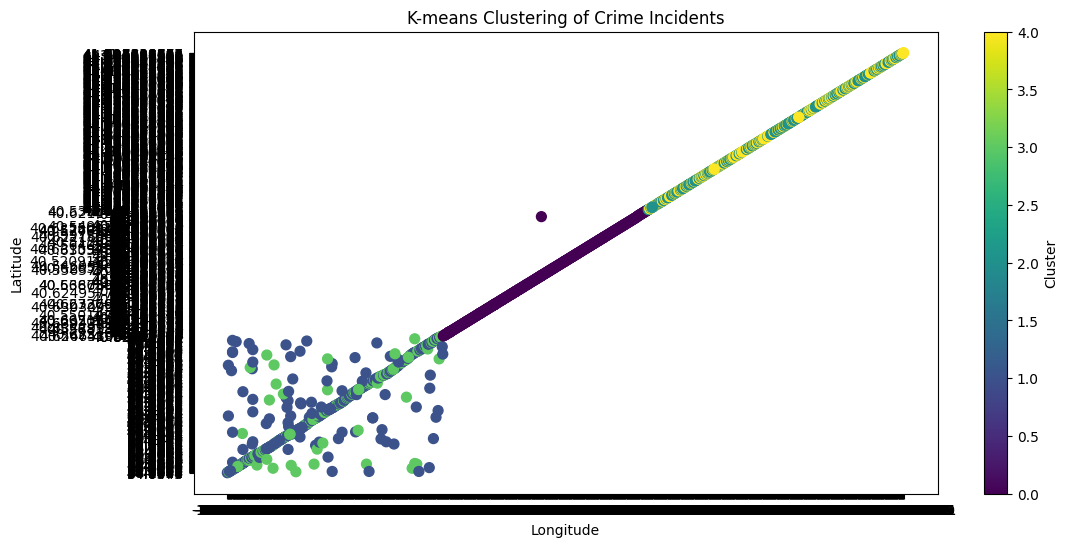

In [32]:
import folium
# Drop rows with NaN values in latitude or longitude columns
cleaned_df = combined_df.dropna(subset=['Latitude', 'Longitude'])

# Create a base map centered at the mean latitude and longitude
# crime_map = folium.Map(location=[cleaned_df['Latitude'].mean(), cleaned_df['Longitude'].mean()], zoom_start=10)
 
# # Add markers for each crime incident
# for index, row in cleaned_df.iterrows():
#     folium.Marker([row['Latitude'], row['Longitude']], popup=row['description']).add_to(crime_map)
 
# # Display the map
# crime_map.save('crime_map.html')
 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
 
 
# Extract latitude and longitude columns
coordinates = cleaned_df[['Latitude', 'Longitude']]
 
# Standardize the data
scaler = StandardScaler()
coordinates_scaled = scaler.fit_transform(coordinates)
 
# Apply K-means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(coordinates_scaled)
cleaned_df['kmeans_cluster'] = kmeans.labels_
 
 
# Visualize K-means clusters
plt.figure(figsize=(12, 6))
plt.scatter(cleaned_df['Longitude'], cleaned_df['Latitude'], c=cleaned_df['kmeans_cluster'], cmap='viridis', s=50)
plt.title('K-means Clustering of Crime Incidents')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Cluster')
plt.show()